# 📊 Comparación de rendimiento: VM vs Docker

In [10]:
from IPython.display import Markdown, display

display(Markdown("""
# 🧪 Comparativa de Rendimiento: VM vs Docker  
**Trabajo Final de TIC**  
**Autora:** Marina Arce Palacín  
**Curso:** 1º Ingeniería Informática  
**Materia:** Tecnologías de la Información y la Comunicación

---

### 📋 Objetivo del Proyecto

Este estudio analiza el rendimiento de una aplicación Flask que convierte imágenes JPG a PNG, ejecutada en dos entornos distintos:

- 🖥️ Máquina Virtual (VM) con Ubuntu 20.04
- 🐳 Contenedor Docker basado en `python:3.10-slim`

Se han comparado métricas clave como:

- Tiempo medio de conversión
- Uso medio de CPU
- Consumo de memoria RAM
- Tiempo de arranque del entorno
- Tamaño del entorno o imagen

---

### 🧰 Entorno de Pruebas

- **Host:** Windows 10, Intel Core i3-9100F, 16 GB RAM
- **VM:** Ubuntu 20.04, 4 GB RAM, 2 vCPU (VirtualBox)
- **Docker:** Imagen `python:3.10-slim`, 2 CPUs asignadas
- **Red:** NAT, acceso a `localhost:5000`

"""))



# 🧪 Comparativa de Rendimiento: VM vs Docker  
**Trabajo Final de TIC**  
**Autora:** Marina Arce Palacín  
**Curso:** 1º Ingeniería Informática  
**Materia:** Tecnologías de la Información y la Comunicación

---

### 📋 Objetivo del Proyecto

Este estudio analiza el rendimiento de una aplicación Flask que convierte imágenes JPG a PNG, ejecutada en dos entornos distintos:

- 🖥️ Máquina Virtual (VM) con Ubuntu 20.04
- 🐳 Contenedor Docker basado en `python:3.10-slim`

Se han comparado métricas clave como:

- Tiempo medio de conversión
- Uso medio de CPU
- Consumo de memoria RAM
- Tiempo de arranque del entorno
- Tamaño del entorno o imagen

---

### 🧰 Entorno de Pruebas

- **Host:** Windows 10, Intel Core i3-9100F, 16 GB RAM
- **VM:** Ubuntu 20.04, 4 GB RAM, 2 vCPU (VirtualBox)
- **Docker:** Imagen `python:3.10-slim`, 2 CPUs asignadas
- **Red:** NAT, acceso a `localhost:5000`



📊 Comparativa completa: VM vs Docker


,Métrica,VM,Docker
0,Tiempo medio de conversión (ms),9.70,2.800
1,Uso medio de CPU (%),1.97,0.870
2,Uso medio de RAM (MB),29.01,28.947
3,Tiempo de arranque (s),4.20,1.900
4,Tamaño del entorno (MB),152.00,49.000


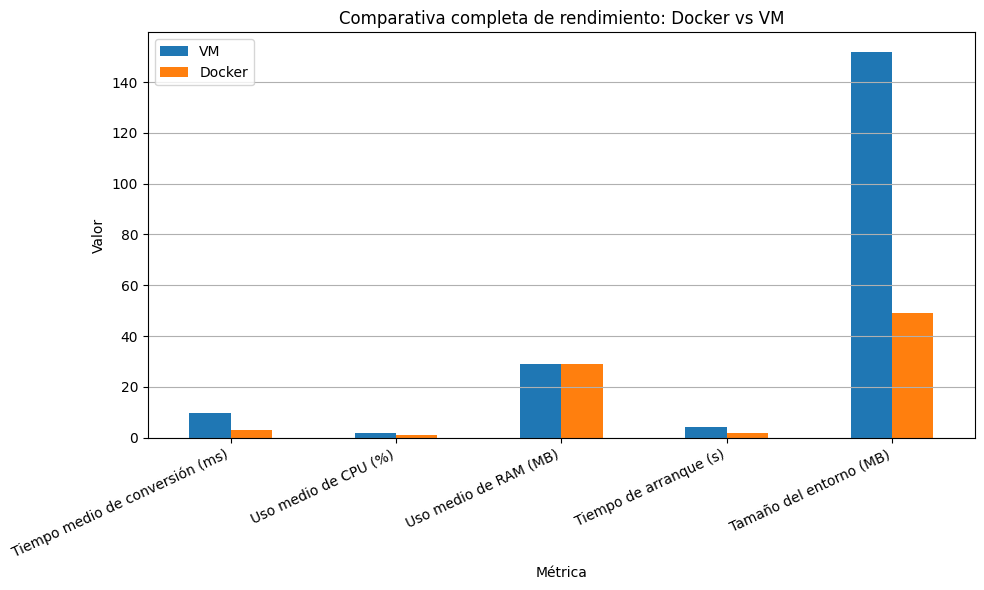

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Asegurar que la carpeta "results" existe
os.makedirs("results", exist_ok=True)

# Datos reales comparativos
datos = {
    "Métrica": [
        "Tiempo medio de conversión (ms)",
        "Uso medio de CPU (%)",
        "Uso medio de RAM (MB)",
        "Tiempo de arranque (s)",
        "Tamaño del entorno (MB)"
    ],
    "VM": [
        9.70,     # Tiempo medio de conversión
        1.97,     # CPU
        29.010,   # RAM
        4.2,      # Tiempo arranque VM
        152       # Tamaño entorno venv
    ],
    "Docker": [
        2.80,     # Tiempo medio de conversión
        0.87,     # CPU
        28.947,   # RAM
        1.9,      # Tiempo arranque Docker
        49        # Tamaño imagen docker
    ]
}

# Crear y mostrar tabla
df_completo = pd.DataFrame(datos)
from IPython.display import display
print("📊 Comparativa completa: VM vs Docker")
display(df_completo)

# Guardar tabla como CSV
df_completo.to_csv("results/comparativa_vm_docker.csv", index=False)

# Crear gráfica de barras
df_plot = df_completo.set_index("Métrica")
fig, ax = plt.subplots(figsize=(10, 6))
df_plot.plot(kind="bar", ax=ax)
plt.title("Comparativa completa de rendimiento: Docker vs VM")
plt.ylabel("Valor")
plt.xticks(rotation=25, ha='right')
plt.grid(axis="y")
plt.tight_layout()
plt.savefig("results/comparativa_global.png")
plt.show()


In [9]:
import pandas as pd

# Leer la tabla desde el archivo CSV
df = pd.read_csv("results/comparativa_vm_docker.csv")

# Convertirla a diccionarios para comparar valores
valores_vm = df["VM"].values
valores_docker = df["Docker"].values
metricas = df["Métrica"].values

# Generar conclusiones
conclusiones = []
for i, metrica in enumerate(metricas):
    vm = valores_vm[i]
    docker = valores_docker[i]
    if vm > docker:
        conclusiones.append(f"✅ **Docker** es mejor en **{metrica}** (Docker: {docker} vs VM: {vm})")
    elif docker > vm:
        conclusiones.append(f"✅ **VM** es mejor en **{metrica}** (VM: {vm} vs Docker: {docker})")
    else:
        conclusiones.append(f"🔷 No hay diferencia significativa en **{metrica}** (ambos: {vm})")

# Mostrar conclusiones
from IPython.display import Markdown, display
display(Markdown("### 📌 Conclusiones automáticas:\n" + "\n".join(f"- {c}" for c in conclusiones)))


### 📌 Conclusiones automáticas:
- ✅ **Docker** es mejor en **Tiempo medio de conversión (ms)** (Docker: 2.8 vs VM: 9.7)
- ✅ **Docker** es mejor en **Uso medio de CPU (%)** (Docker: 0.87 vs VM: 1.97)
- ✅ **Docker** es mejor en **Uso medio de RAM (MB)** (Docker: 28.947 vs VM: 29.01)
- ✅ **Docker** es mejor en **Tiempo de arranque (s)** (Docker: 1.9 vs VM: 4.2)
- ✅ **Docker** es mejor en **Tamaño del entorno (MB)** (Docker: 49.0 vs VM: 152.0)

In [11]:
from IPython.display import Markdown, display
import pandas as pd

# Leer los resultados desde el CSV
df = pd.read_csv("results/comparativa_vm_docker.csv")

# Variables clave para el texto
tiempo_vm = df.loc[0, "VM"]
tiempo_docker = df.loc[0, "Docker"]
cpu_vm = df.loc[1, "VM"]
cpu_docker = df.loc[1, "Docker"]
ram_vm = df.loc[2, "VM"]
ram_docker = df.loc[2, "Docker"]
arranque_vm = df.loc[3, "VM"]
arranque_docker = df.loc[3, "Docker"]
tamaño_vm = df.loc[4, "VM"]
tamaño_docker = df.loc[4, "Docker"]

# Conclusión redactada
texto = f"""
### 🧾 Conclusión General

Este análisis demuestra que **Docker ofrece un mejor rendimiento general frente a una Máquina Virtual** en el despliegue de una aplicación Flask de conversión de imágenes.

- 🐳 **Docker convierte imágenes más rápido** ({tiempo_docker:.2f} ms) que la VM ({tiempo_vm:.2f} ms).
- 🧠 **Docker también consume menos CPU** ({cpu_docker:.2f}% vs {cpu_vm:.2f}%).
- 💾 El uso de **RAM es prácticamente igual**, con valores muy similares ({ram_docker:.2f} MB vs {ram_vm:.2f} MB).
- 🚀 **Docker arranca el entorno más rápido** ({arranque_docker:.1f} s) comparado con la VM ({arranque_vm:.1f} s).
- 📦 Además, **la imagen Docker es significativamente más ligera** ({tamaño_docker} MB) frente al entorno virtual completo ({tamaño_vm} MB).

En resumen, **Docker es una opción más eficiente y portable** para aplicaciones ligeras y procesos automatizados, mientras que las máquinas virtuales pueden seguir siendo útiles en entornos donde se requiere un aislamiento total del sistema operativo.
"""

# Mostrar en Markdown
display(Markdown(texto))




### 🧾 Conclusión General

Este análisis demuestra que **Docker ofrece un mejor rendimiento general frente a una Máquina Virtual** en el despliegue de una aplicación Flask de conversión de imágenes.

- 🐳 **Docker convierte imágenes más rápido** (2.80 ms) que la VM (9.70 ms).
- 🧠 **Docker también consume menos CPU** (0.87% vs 1.97%).
- 💾 El uso de **RAM es prácticamente igual**, con valores muy similares (28.95 MB vs 29.01 MB).
- 🚀 **Docker arranca el entorno más rápido** (1.9 s) comparado con la VM (4.2 s).
- 📦 Además, **la imagen Docker es significativamente más ligera** (49.0 MB) frente al entorno virtual completo (152.0 MB).

En resumen, **Docker es una opción más eficiente y portable** para aplicaciones ligeras y procesos automatizados, mientras que las máquinas virtuales pueden seguir siendo útiles en entornos donde se requiere un aislamiento total del sistema operativo.
